In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants as const
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import LogNorm
from scipy import interpolate
from tqdm import notebook

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ml = MultipleLocator(2)

In [3]:
nx = 360
ny = 50 
nz = 200

In [5]:
## Read txt file using numpy
data = np.loadtxt("nElectrons.txt", skiprows=3, usecols=(0, 1, 2, 3), delimiter=',')

In [6]:
data.shape

(3600000, 4)

In [7]:
new_data = data.reshape(nx, ny, nz, 4)

In [8]:
new_data[200, 25, 100, 3]

2244.0

In [11]:
projection2D = np.zeros((nz, nx))
#
for ix in notebook.tqdm(range(0, nx)):
    for iz in range(0, nz):
        for iy in range(0, ny):
            projection2D[iz, ix] = projection2D[iz, ix] + new_data[ix, iy, iz, 3]

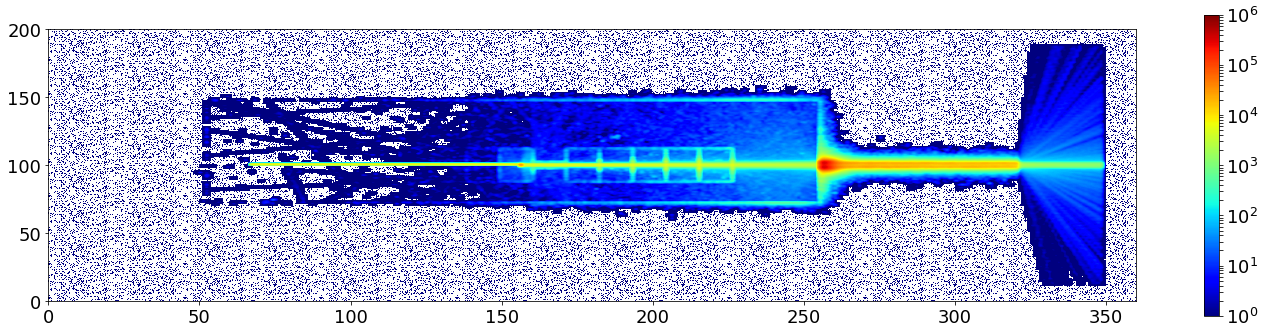

In [12]:
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.imshow(projection2D, cmap=cm.jet, norm=LogNorm(1, 1e6), interpolation='quadric' ,
                origin='lower', aspect=0.45, extent=[0,nx,0,nz])
plt.colorbar(im)
#
fig.tight_layout()
#plt.savefig('projection2D_lower.png', dpi=500)

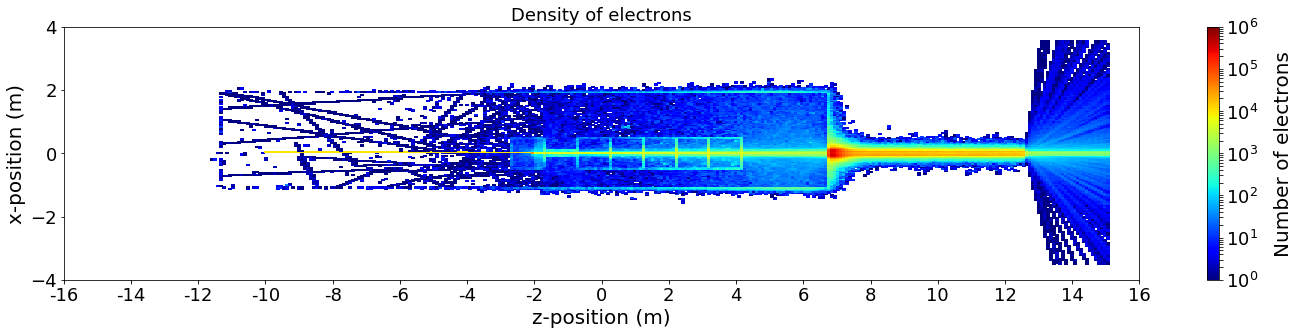

In [15]:
x = np.linspace(-16, 16, nx)
z = np.linspace(-4, 4, nz)
XX, ZZ = np.meshgrid(x, z)
#
fig, axes1 = plt.subplots(1, 1, figsize=(20, 5))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.pcolormesh(XX, ZZ, projection2D, cmap=cm.jet, norm=LogNorm(1, 1e6))
ax.set_xlabel("z-position (m)")
ax.set_ylabel("x-position (m)")
ax.set_title(r"Density of electrons")
cbar = plt.colorbar(im)
#
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r'Number of electrons')
#
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(2))
#
fig.tight_layout()
plt.savefig('projection2D_pcolormesh_electrons.png', dpi=500)

# Interpolation

In [16]:
## Interpolate
x_array = np.arange(0, nx, 1)
z_array = np.arange(0, nz, 1)
f = interpolate.interp2d(x_array, z_array, projection2D, kind='cubic')

In [17]:
x_new = np.arange(0, nx, 0.1e-1)
z_new = np.arange(0, nz, 0.1e-1)
znew = f(x_new, z_new)

MemoryError: 

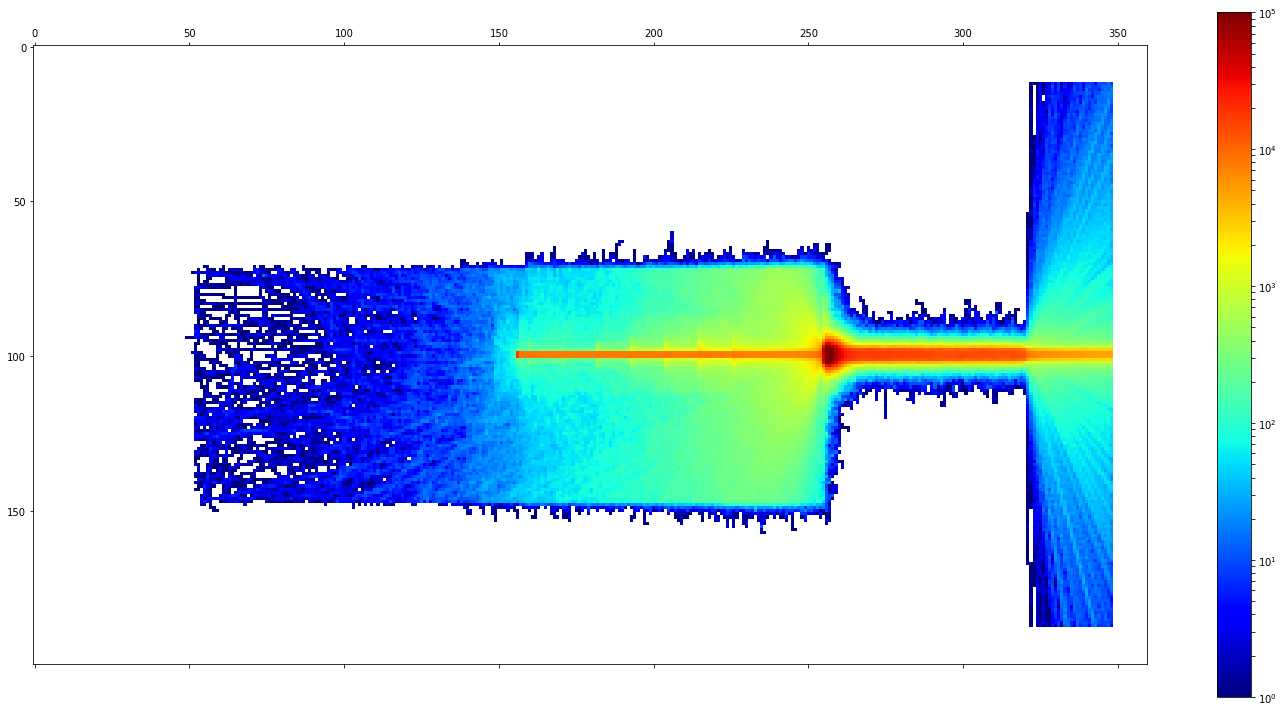

In [12]:
fig, axes1 = plt.subplots(1, 1, figsize=(20,10))
axes = iter(np.ravel(axes1))
#
ax = next(axes)
#im = plt.imshow(projection2D, norm=LogNorm(1, 1e5))
im = ax.matshow(projection2D, cmap=cm.jet, norm=LogNorm(1, 1e5))
plt.colorbar(im)
#
fig.tight_layout()
plt.savefig('projection2D_interpolated.pdf')